## First Visit Monte Carlo Prediction Estimating State-Value Function

In [7]:
import sys
import os

sys.path.append(os.path.dirname(os.getcwd()))

from gridworld import GridWorld,plot_value, plot_policy
import numpy as np

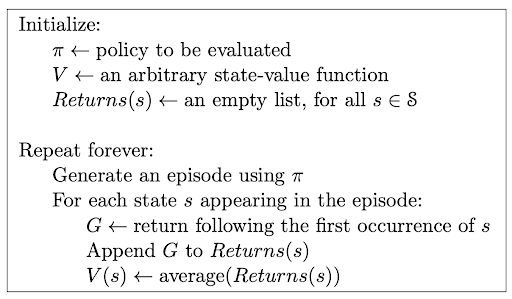

In [18]:
def generate_episode(Pi,size):
    '''
    play an episode on given policy and return G
    '''
    
    env = GridWorld(size)
    done = False
    G = {} #episode reward
    
    while not done:

        #current_state
        current_state = env.agent_position.copy()
        
        #get action and step
        action_prob = Pi[tuple(current_state)] #
        action = np.random.choice(range(len(action_prob)),p = action_prob)
        next_state, reward, done, info = env.step(action)
        
        #append reward to all visited state
        if tuple(current_state) in G:
            G = {k:v+reward for k,v in G.items()}
        else:
            G[tuple(current_state)] = 0
            G = {k:v+reward for k,v in G.items()}

    return G

In [19]:
#TEST
size = 4
Pi = dict.fromkeys([(i,j) for i in range(size) for j in range(size) if i+j != 0 and i+j != (size-1)*2], [0.25]*4)# inital actions as UP

generate_episode(Pi,size)

{(2, 2): -30,
 (2, 3): -29,
 (1, 2): -27,
 (1, 3): -26,
 (0, 2): -23,
 (0, 1): -15,
 (1, 1): -14,
 (2, 1): -11,
 (2, 0): -8,
 (1, 0): -7,
 (3, 0): -3,
 (3, 1): -2,
 (3, 2): 0}

In [11]:
def MC_prediction(Pi,size,iter_num):
    '''
    perfrom first-visit MC prediction
    '''
    
    V = dict.fromkeys([(i,j) for i in range(size) for j in range(size)], 0) # values as 0
    Returns = {k: [] for k in [(i,j) for i in range(size) for j in range(size)]} # returns as 0
    
    
    for i in range(iter_num):
        #generate an episode
        G = generate_episode(Pi,size)
        
        for seen_state in G:
            #append G to Returns
            Returns[seen_state]+=[G[seen_state]]
            #average returns and update V
            V[seen_state] = round(sum(Returns[seen_state])/len(Returns[seen_state]),1)
    return V,Returns

In [16]:
size = 5
V = dict.fromkeys([(i,j) for i in range(size) for j in range(size)], 0) # values as 0
Pi = dict.fromkeys([(i,j) for i in range(size) for j in range(size) if i+j != 0 and i+j != (size-1)*2], [0.25]*4)# inital actions as UP
V_final,Returns = MC_prediction(Pi,size,1000)

In [17]:
plot_value(V_final,size)

0	|-23.2	|-34.3	|-39.4	|-41.1	|
-21.6	|-30.4	|-35.8	|-38.9	|-39.8	|
-33.3	|-36.2	|-37.3	|-36.4	|-34.4	|
-38.7	|-38.8	|-36.1	|-30.5	|-22.9	|
-40.9	|-39.4	|-34.0	|-22.4	|0	|
